## Невронни мрежи в Scikit-Learn

В предишното упражнение съставихме относително проста невронна мрежа на ниско ниво, съставено от математически формули. Въпреки това, библиотеки като scikit-learn предоставят вече готови методи и класове за обучаване на невронни мрежи.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Нека пресъздадем невронната мрежа от ЛУ 11:

In [2]:
iris = sns.load_dataset('iris')

In [3]:
X = iris.iloc[:,:4]
y = iris.species

Създаваме и тренираме модела си по стандартните за scikit-learn методи. Вместо нормално снижаване на градиента ще изпозлваме оптимизирана негова версия, стохастично снижаване на градиента (stochastic gradient descent), което е същото като принцип. Тъй като класът на sklearn предлага възможности за динамична оптимизация на учебната скорост, ще зададем константна learning_rate от 0.5 (както в оригиналния ни модел). Епохите на обучение тук се задават с max_iter. Ще зададем и сийд за генерация на произволни числа, за да може още по-близко да възпроизведем изначалната си мрежа. Друга оптимизация в алгоритъма на sklearn е автоматичното прекратяване на обучението, когато мрежата не е подобрила точността си с толерантност tol в продължение на n_iter_no_change на брой епохи. Задавайки стойността на n_iter_no_change като равна на max_iter, ние на практика изключваме възможността за автоматично прекратяване на обучението.

In [4]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(
    hidden_layer_sizes=(40, 40),
    activation = 'logistic', # друг термин за сигмоида
    solver = 'sgd',
    learning_rate = 'constant',
    learning_rate_init = .5,
    max_iter = 1000,
    random_state = 42,
    tol = 0.0001,
    n_iter_no_change = 1000
)

Нека обучим мрежата си и проверим нейните резултати:

In [5]:
mlpc.fit(X,y)
mlpc.score(X,y)

c:\Users\Atanas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9866666666666667

Както виждаме, мрежата има доста близък успех до тази от миналия път (дори е малко по-точна). Получаваме и предупреждение, предизвикано от факта, че обучението не е приключило само. Ще използваме библиотеката warnings за да не получаваме такива известия в бъдеще.

In [6]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

Сега нека се опитаме да създадем по-традиционна за sklearn мрежа с подобни хиперпараметри на горната:

In [7]:
mlpc = MLPClassifier(
    hidden_layer_sizes=(40, 40),
    activation='logistic',
    solver = 'adam',
    learning_rate = 'constant',
    learning_rate_init = .001,
    max_iter=250,
    random_state=42,
    tol = .0001,
    n_iter_no_change = 10
)
mlpc.fit(X,y)
mlpc.score(X,y)

0.9866666666666667

Виждаме същия успех, но с по-малко итерации. Сега нека проверим успеваемостта на различните оптимизатори в еднакви условия:

In [8]:
for optimizer in ['sgd', 'adam', 'lbfgs']:


    mlpc = MLPClassifier(
        hidden_layer_sizes=(40, 40),
        activation='logistic',
        solver = optimizer,
        learning_rate = 'constant',
        learning_rate_init = .001,
        max_iter=200,
        random_state=42,
        tol = 0.0001,
        n_iter_no_change = 10
    )

    mlpc.fit(X,y)
    score = mlpc.score(X,y)

    print(f'Optimizer {optimizer} scored {round(score, 2)}.')

Optimizer sgd scored 0.33.
Optimizer adam scored 0.98.
Optimizer lbfgs scored 1.0.


Виждаме голяма разлика. Сега нека засечем колко време отнема всеки.

In [9]:
from datetime import datetime

for optimizer in ['sgd', 'adam', 'lbfgs']:

    train_start = datetime.now()

    mlpc = MLPClassifier(
        hidden_layer_sizes=(40, 40),
        activation='logistic',
        solver = optimizer,
        learning_rate = 'constant',
        learning_rate_init = .001,
        max_iter=200,
        random_state=42,
        tol = 0.0001,
        n_iter_no_change = 10
    )

    mlpc.fit(X,y)
    score = mlpc.score(X,y)

    train_end = datetime.now()
    train_delta = train_end - train_start
    print(f'Optimizer {optimizer} scored {round(score, 2)}. Training took {train_delta}.')

Optimizer sgd scored 0.33. Training took 0:00:00.020499.
Optimizer adam scored 0.98. Training took 0:00:00.092021.
Optimizer lbfgs scored 1.0. Training took 0:00:00.108026.


Забелязваме, че макар sgd да е по-неточен, той е доста по-бърз и може да е по-полезен в някои ситуации. Както видяхме, той може да постигне също толкова добри резултати колкото и другите оптимизатори, стига да му се оставят повече епохи. Нека опитаме да адресираме това като зададем по-висока толерантност (т.е. по-ниски стойности на оптимизация, които алгоритъмът да очаква).

In [10]:
for tol in [.0001, .00001, .000001, 1e-7]:
    train_start = datetime.now()

    mlpc = MLPClassifier(
        hidden_layer_sizes=(40, 40),
        activation='logistic',
        solver = 'sgd',
        learning_rate = 'constant',
        learning_rate_init = .001,
        max_iter=2000,
        random_state=42,
        tol = tol,
        n_iter_no_change = 10
    )

    mlpc.fit(X,y)
    score = mlpc.score(X,y)

    train_end = datetime.now()
    train_delta = train_end - train_start
    print(f'Optimizer sgd with tolerance {tol} scored {round(score, 2)}. Training took {train_delta}.')


Optimizer sgd with tolerance 0.0001 scored 0.33. Training took 0:00:00.019005.
Optimizer sgd with tolerance 1e-05 scored 0.71. Training took 0:00:00.829992.
Optimizer sgd with tolerance 1e-06 scored 0.71. Training took 0:00:00.808060.
Optimizer sgd with tolerance 1e-07 scored 0.71. Training took 0:00:00.806548.


Имаме подобрение, но бързо удряме таван, някъде между 1е-4 и 1е-5. Нека намерим оптималната толерантност за нашата мрежа.

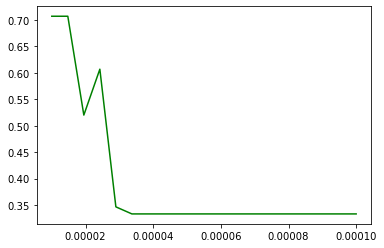

In [11]:
tolerances = np.linspace(1e-4, 1e-5, 20)
scores = []

for tol in tolerances:

    mlpc = MLPClassifier(
        hidden_layer_sizes=(40, 40),
        activation='logistic',
        solver = 'sgd',
        learning_rate = 'constant',
        learning_rate_init = .001,
        max_iter=2000,
        random_state=42,
        tol = tol,
        n_iter_no_change = 10
    )

    mlpc.fit(X,y)
    score = mlpc.score(X,y)

    scores.append(score)

elbow_graph = plt.plot(
    tolerances,
    scores,
    color = 'g'
)

Виждаме, че таванът на ефикасност е много близко до 1e-5, така че можем да го оставим там. Подобни тестове можем да направим за всеки хиперпараметър в [документацията на класа](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

### Разпознаване на изображения

Вече видяхме, че можем спокойно да използваме невронни мрежи за класически машинни задачи като класифициране. Сега нека опитаме да решим доста по-сложна задача: разпознаване на изображения. Първо, нека заредим пробен набор от данни: 

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Зареждаме данни от https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False
)
X = X / 255.0
X.shape


(70000, 784)

MNIST е известен обучителен набор данни, Х е матрица от 70000 черно-бели изображения от по 784 пиксела (0 = черно, .5=сиво, 1 = бяло). Всяка матрица представлява изображение на ръкописна цифра, а всяко съответстващо у е нейният етикет, т.е. какво изобразява снимката.

Label:  0


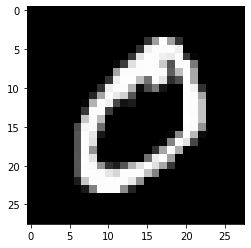

In [13]:
plt.imshow(
    X[1].reshape(28,28), 
    cmap='gray'
) #За да нарисуваме изображението с pyplot първо трябва да го сложим в две измерения (28х28 пиксела). Cmap = 'grey' задава стойностите да бъдат начертаниот черно към бяло.
print('Label: ', y[1])
plt.show()

Тренираме модел, както горе. Обърнете внимание на високия процент тестови данни: това е поради сериозния размер на цялостния набор.

Въвели сме и доста повече параметри:
- max_iter - максималният брой на обратни разпространения на грешката
- solver - Това е методът с който променяме тежестите и отклоненията на нашата мрежа. В случая сме избрали 'sdg', Stochastic Gradient Descent
- verbose - дали да получаваме системни съобщения
- random_state - Подсигурява единни псевдопроизволни стартови тежести и отклонения и следователно репликация на невронната мрежа
- learning_rate_init - настройва скоростта на учене на мрежата (когато използваме sgd)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=13,
    solver="sgd",
    verbose=True, # verbose ни дава повече информация за всяка итерация
    random_state=42,
    learning_rate_init=0.2
)

mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 0.43876685
Iteration 2, loss = 0.18161919
Iteration 3, loss = 0.13374561
Iteration 4, loss = 0.10868499
Iteration 5, loss = 0.09370377
Iteration 6, loss = 0.07700252
Iteration 7, loss = 0.06711732
Iteration 8, loss = 0.05950473
Iteration 9, loss = 0.04724625
Iteration 10, loss = 0.03772541
Iteration 11, loss = 0.03398228
Iteration 12, loss = 0.02792381
Iteration 13, loss = 0.02417733
Training set score: 0.995048
Test set score: 0.956918


Можем да извикаме теглата си с атрибуте coef_ и отклоненията си с intercepts_

In [15]:
mlp.coefs_[0].shape

(784, 40)

In [16]:
mlp.intercepts_[0].shape

(40,)

Можем да начертаем самите коефициенти като изображения. Тази способност да чертаем правилата на невронни мрежи е в основата на машинната генерация на изображения.

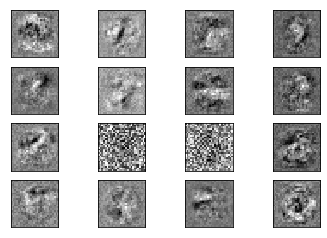

In [17]:
fig, axes = plt.subplots(4, 4)

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Както обикновено, можем да предвидим резултатите си чрез predict:

In [18]:
pred_y = mlp.predict(X)
pred_y[1]

'0'

Нека добавим предвидените и реалните стойности в единна таблица, редом със самите изображения. Х е единен масив и ще трябва да го разделим на броя на неговите редове чрез np.split:

In [19]:
X.shape

(70000, 784)

In [20]:
X_as_list = np.split(X, X.shape[0])
X_as_list[0].shape

(1, 784)

In [21]:
data_dict = {'img':X_as_list, 'label':y, 'predicted':pred_y}
data = pd.DataFrame(data_dict)
data.head()

,img,label,predicted
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,3
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4,4
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,1
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,9


Вече можем лесно да начретаем всяко изображение редом с предвидената и реалната му стойност.

Label:  0
Predicted:  0


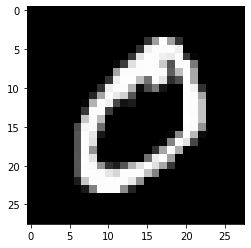

In [22]:
plt.imshow(data.img[1].reshape(28,28), cmap='gray')
print('Label: ',data.label[1])
print('Predicted: ', data.predicted[1])
plt.show()

Създаваме колонка с верните и грешните предвиждания (където реалната стойнсот е равна или не на предвидената):

In [23]:
data['correct'] = data.label==data.predicted
data.correct.head()

0    False
1     True
2     True
3     True
4     True
Name: correct, dtype: bool

Сега можем чрез филтриране да отделим и разгледаме само грешните предположения:

In [24]:
data_incorrect = data[data.correct==False]
data_incorrect.head()

,img,label,predicted,correct
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,3,False
24,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,3,False
29,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,4,False
48,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,3,False
54,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,7,False


Label:  1
Predicted:  3


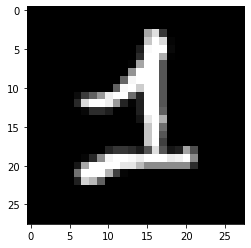

In [25]:
plt.imshow(data.img[24].reshape(28,28), cmap='gray')
print('Label: ',data.label[24])
print('Predicted: ', data.predicted[24])
plt.show()

За по-лесно принтиране изображения си дефинираме функция, която принтира етикета, предикцията, и самото изображение:

In [26]:
def display_result(index):
  plt.imshow(data.img[index].reshape(28,28), cmap='gray')
  print('Label: ',data.label[index])
  print('Predicted: ', data.predicted[index])
  plt.show()

Label:  9
Predicted:  3


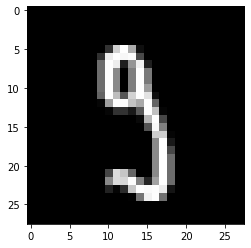

In [27]:
display_result(48)

Нека покажем първите 3 грешни предикции:

Label:  5
Predicted:  3


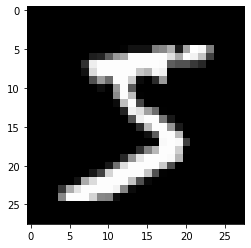

Label:  1
Predicted:  3


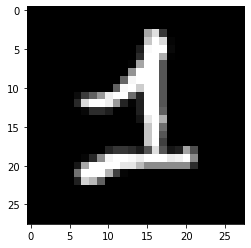

Label:  7
Predicted:  4


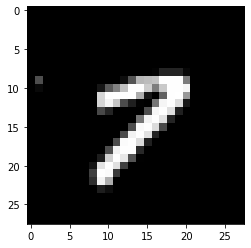

In [28]:
for i in data_incorrect.index[:3]:
  display_result(i)

### Задача

Тренирайте Ваша невронна мрежа за класификация. Може да я използвате върху предишен набор от данни, но можете и да опитате да тренирате алгоритъм за разпознаване на изображения върху някой от [следните набори](https://www.analyticsvidhya.com/blog/2018/03/comprehensive-collection-deep-learning-datasets/). Имайте предвид че много от тези набори изискват специфична предобработка. Опитайте се сами да отгатнете как да кодирате изображенията си чрез онлайн ресурси (вкл. и чат гпт). Не се притесянвайте и да поискате съвет.